In [ ]:
 ! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thaheerhussains","key":"71ad1723c1b79edcd9839c0e179ee357"}'}

In [ ]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           8817        285  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           7189        170  1.0              
amaanansari09/top-100-songs                                Top 100 songs                                 6KB  2023-02-16 18:55:35           2157         72  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:2

In [ ]:
!unzip vehicle-dataset-from-cardekho.zip 

Archive:  vehicle-dataset-from-cardekho.zip
replace CAR DETAILS FROM CAR DEKHO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Car details v3.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace car data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace car details v4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
! kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

  0% 0.00/292k [00:00<?, ?B/s]
100% 292k/292k [00:00<00:00, 77.3MB/s]


In [1]:
!pip install pandas

  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)


You should consider upgrading via the 'c:\users\thaheerhussain\desktop\project\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [41]:
#data processing
car_dataset=pd.read_csv("car data.csv")

In [42]:
car_dataset.head(5) # checking first rows

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [43]:
car_dataset.shape

(301, 9)

In [44]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
car_dataset.isnull().sum() #tell's us about null values in dataset

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [46]:
print(car_dataset.Fuel_Type.value_counts()) #categorical data check
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [47]:
#encoding the categorical data
"fuel Type column"
car_dataset.replace({"Fuel_Type":{'Petrol':0,"Diesel":1,"CNG":2}},inplace=True)

"seller_type column"
car_dataset.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

"Transmission column"
car_dataset.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

In [48]:
car_dataset.head() #checking encoded data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [49]:
#data split to target
X=car_dataset.drop(['Car_Name',"Selling_Price"],axis=1)
Y=car_dataset["Selling_Price"]

In [50]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [51]:
X_train , X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [52]:
print(X_train)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
204  2015          4.430       28282          0            0             0   
249  2016          7.600       17000          0            0             0   
277  2015         13.600       21780          0            0             0   
194  2008          0.787       50000          0            1             0   
244  2013          9.400       49000          1            0             0   
..    ...            ...         ...        ...          ...           ...   
75   2015          6.800       36000          0            0             0   
22   2011          8.010       50000          0            0             1   
72   2013         18.610       56001          0            0             0   
15   2016         10.790       43000          1            0             0   
168  2013          0.730       12000          0            1             0   

     Owner  
204      0  
249      0  
277      0  
194      0 

In [53]:
#model Train
lin_reg=LinearRegression()

In [54]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [55]:
#model evaluation
training_data_prediction=lin_reg.predict(X_train)

In [56]:
error_score=metrics.r2_score(Y_train,training_data_prediction)

In [57]:
print(error_score * 100,"%") #error rate of the model

87.99451660493699 %


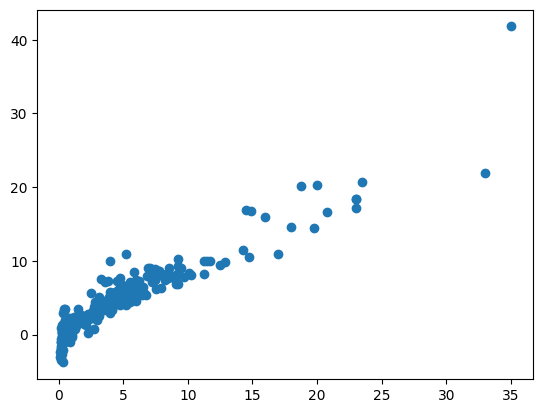

In [58]:
plt.scatter(Y_train,training_data_prediction)

In [59]:
  test_data_prediction = lin_reg.predict(X_test)

In [60]:
error_scoret=metrics.r2_score(Y_test,test_data_prediction)

In [61]:
error_scoret

0.8365766715026473

In [62]:
#trying lasso 

lasso_model=Lasso()

In [63]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [64]:
train_data_lasso=lasso_model.predict(X_train)#train

In [65]:
error_score_lasso=metrics.r2_score(Y_train,train_data_lasso)

In [66]:
error_score_lasso

0.8427856123435795

In [67]:
test_data_lasso=lasso_model.predict(X_test)#test

In [68]:
error_score_lasso_t=metrics.r2_score(Y_test,test_data_lasso)
error_score_lasso_t

0.8709167941173201

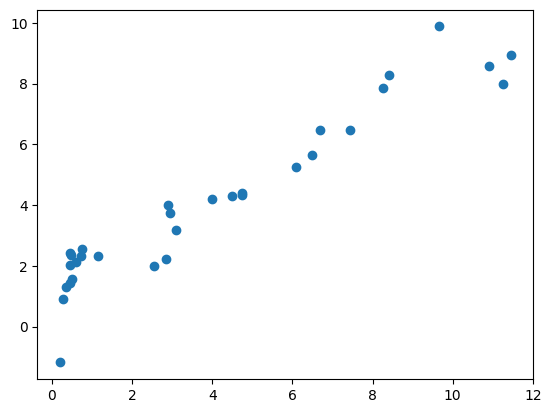

In [69]:
plt.scatter(Y_test,test_data_lasso)